## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

## Loading the dataset

In [2]:
ddata = pd.read_csv("resources/divorce.csv")

## Displaying the first few rows of the dataset

In [3]:
ddata.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


## Displaying information about the dataset (data types, non-null counts, etc.)

In [4]:
ddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2205 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB


## Checking for missing values in the dataset

In [5]:
missing_values = ddata.isnull().sum()
print("Missing Values:\n")

missing_values

Missing Values:



divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: int64

## Summary statistics for numerical columns

In [6]:
summary_stats = ddata.describe()
print("Summary Statistics:\n")

summary_stats

Summary Statistics:



,income_man,income_woman,marriage_duration,num_kids
count,2209.000000,2209.000000,2209.000000,1333.000000
mean,7922.986410,6793.164545,9.606609,1.672918
std,7693.796497,6562.928689,7.266696,0.732858
min,3.000000,3.500000,1.000000,1.000000
25%,3600.000000,3000.000000,4.000000,1.000000
50%,6000.000000,5000.000000,8.000000,2.000000
75%,10000.000000,8000.000000,14.000000,2.000000
max,80000.000000,90000.000000,32.000000,5.000000


## Visualizing the distribution of marriage durations

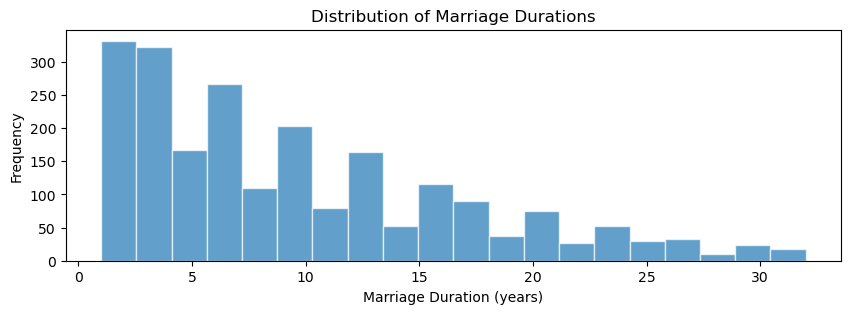

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.hist(ddata['marriage_duration'], bins=20, edgecolor='white', alpha=0.7)
plt.title('Distribution of Marriage Durations')
plt.xlabel('Marriage Duration (years)')
plt.ylabel('Frequency')
plt.show()

## Correlation matrix for numerical columns

In [14]:
numeric_columns = ddata.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
print("Correlation Matrix:\n")

correlation_matrix

Correlation Matrix:



,income_man,income_woman,marriage_duration,num_kids
income_man,1.000000,0.318047,0.085321,0.040848
income_woman,0.318047,1.000000,0.078677,-0.018015
marriage_duration,0.085321,0.078677,1.000000,0.447358
num_kids,0.040848,-0.018015,0.447358,1.000000


## Splitting the dataset into train and test sets

In [9]:
from sklearn.model_selection import train_test_split

X = ddata.drop('num_kids', axis=1)
y = ddata['num_kids']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration
841,2008-12-05,1951-10-28,Professional,10000.0,1960-03-30,Preparatory,9000.0,1981-08-14,27.0
1973,2004-04-28,1955-09-14,Primary,1200.0,1958-06-15,Primary,1900.0,1978-03-13,25.0
798,2004-11-11,1970-05-30,Professional,6638.0,1971-09-12,Professional,6638.0,1995-12-01,9.0
1234,2004-12-17,1973-11-16,Preparatory,2400.0,1978-08-21,Professional,15000.0,1997-03-25,7.0
1362,2008-08-19,1980-02-12,Preparatory,4000.0,1977-11-19,Preparatory,6500.0,2005-04-15,30.0
...,...,...,...,...,...,...,...,...,...
1638,2010-02-23,1975-04-28,Professional,6000.0,1976-10-18,Professional,10000.0,2007-04-26,1.0
1095,2005-12-15,1951-03-11,Preparatory,15000.0,1954-01-12,Professional,15000.0,1982-12-22,23.0
1130,2004-06-16,1953-10-24,Professional,8000.0,1966-12-07,Professional,8000.0,1996-03-29,8.0
1294,2008-09-18,1957-08-16,Secondary,2200.0,1955-05-22,Professional,4000.0,1978-04-05,30.0


In [11]:
X_test

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration
855,2002-12-07,1966-11-16,Preparatory,8000.0,1970-07-26,Professional,3000.0,1993-02-04,9.0
1546,2006-11-21,1969-02-06,Professional,7000.0,1974-05-04,Professional,7000.0,2003-01-08,3.0
1473,2007-11-20,1981-08-15,Secondary,2000.0,1981-06-19,Secondary,2000.0,1998-04-13,9.0
430,2008-07-02,1968-02-14,Professional,6000.0,1967-06-05,Professional,4000.0,1993-06-05,13.0
1557,2005-12-21,1963-12-24,Professional,16000.0,1968-08-23,Professional,16000.0,1994-03-06,11.0
...,...,...,...,...,...,...,...,...,...
1319,2004-02-19,1954-06-12,Secondary,5000.0,1950-04-25,Preparatory,3000.0,1990-08-28,13.0
1854,2003-09-26,1961-01-09,Professional,3000.0,1966-01-31,Secondary,2400.0,2002-05-31,1.0
1931,2007-09-27,1970-02-07,Preparatory,7000.0,1970-06-21,Professional,7000.0,1989-10-06,18.0
59,2009-02-01,1970-09-22,Secondary,20000.0,1974-09-06,Professional,8000.0,2003-07-23,5.0


In [12]:
y_train

841     3.0
1973    3.0
798     2.0
1234    NaN
1362    1.0
       ... 
1638    NaN
1095    2.0
1130    NaN
1294    1.0
860     2.0
Name: num_kids, Length: 1767, dtype: float64

In [13]:
y_test

855     NaN
1546    NaN
1473    2.0
430     NaN
1557    2.0
       ... 
1319    2.0
1854    NaN
1931    1.0
59      NaN
71      2.0
Name: num_kids, Length: 442, dtype: float64